In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df=pd.read_csv('Company_data.csv')

In [3]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [4]:
df.shape

(400, 11)

In [5]:
print((df.isnull().sum()/df.shape[0])*100)

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc      0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.describe().T

count        mean         std   min     25%     50%     75%  \
Sales        400.0    7.496325    2.824115   0.0    5.39    7.49    9.32   
CompPrice    400.0  124.975000   15.334512  77.0  115.00  125.00  135.00   
Income       400.0   68.657500   27.986037  21.0   42.75   69.00   91.00   
Advertising  400.0    6.635000    6.650364   0.0    0.00    5.00   12.00   
Population   400.0  264.840000  147.376436  10.0  139.00  272.00  398.50   
Price        400.0  115.795000   23.676664  24.0  100.00  117.00  131.00   
Age          400.0   53.322500   16.200297  25.0   39.75   54.50   66.00   
Education    400.0   13.900000    2.620528  10.0   12.00   14.00   16.00   

                max  
Sales         16.27  
CompPrice    175.00  
Income       120.00  
Advertising   29.00  
Population   509.00  
Price        191.00  
Age           80.00  
Education     18.00

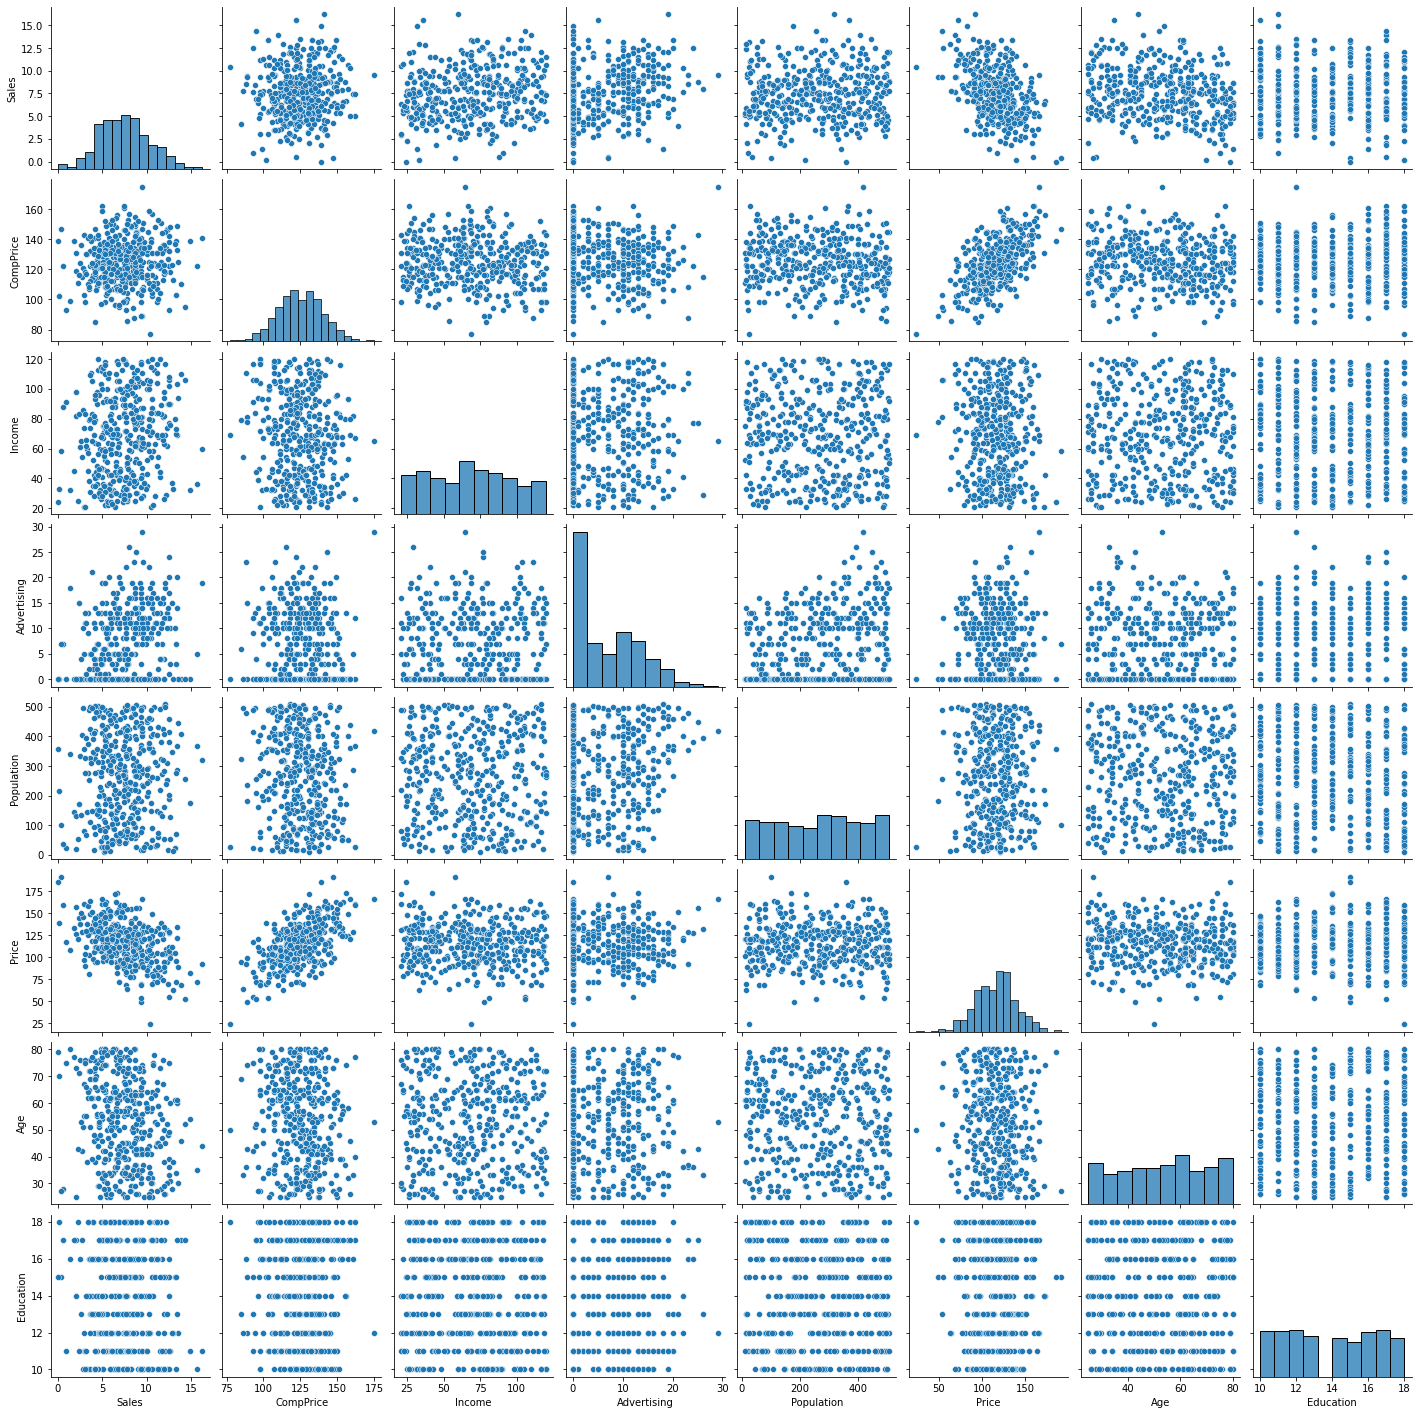

In [8]:
sns.pairplot(df)

<AxesSubplot:>

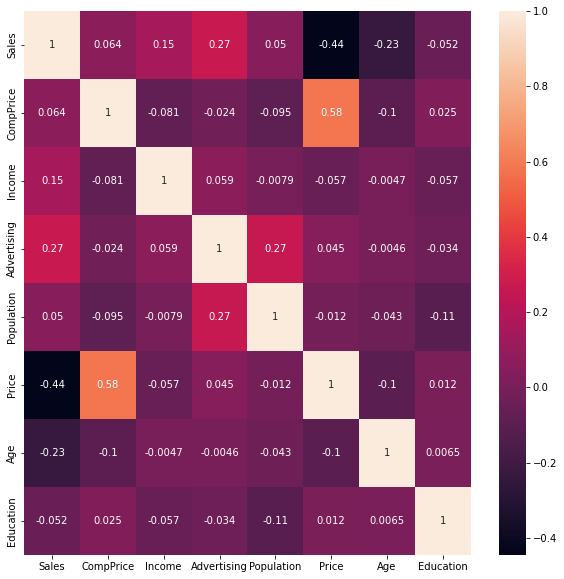

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompPrice', ylabel='Price'>

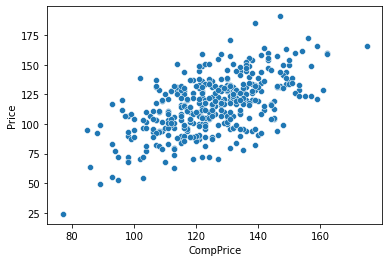

In [10]:
sns.scatterplot(df['CompPrice'],df['Price'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

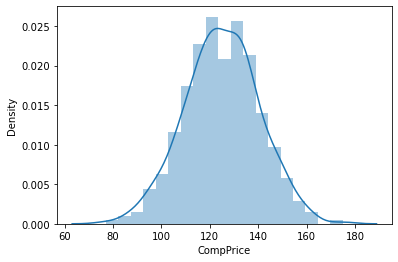

In [11]:
sns.distplot(df['CompPrice'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

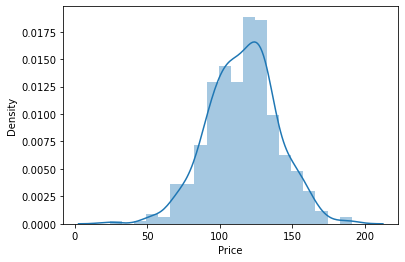

In [12]:
sns.distplot(df['Price'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

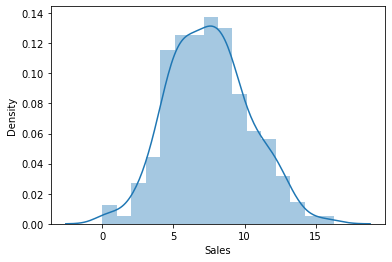

In [13]:
sns.distplot(df['Sales'])

In [14]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Advertising'>

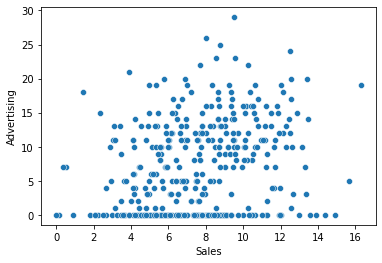

In [15]:
sns.scatterplot(df['Sales'],df['Advertising'])

In [16]:
df[df['Advertising']==0]

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
6     6.63        115     105            0          45    108    Medium   71   
8     6.54        132     110            0         108    124    Medium   76   
9     4.69        132     113            0         131    124    Medium   76   
16    7.58        118      32            0         284    110      Good   63   
18   13.91        110     110            0         408     68      Good   46   
..     ...        ...     ...          ...         ...    ...       ...  ...   
379   5.81        125     111            0         404    107       Bad   54   
383   9.35         98     117            0          76     68    Medium   63   
386   5.32        152     116            0         170    160    Medium   39   
391   6.10        153      63            0          49    124       Bad   56   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
6           15   Yes   No  
8           10    No   No  
9           17    No  Yes  
16          13   Yes   No  
18          17    No  Yes  
..         ...   ...  ...  
379         15   Yes   No  
383         10   Yes   No  
386         16   Yes   No  
391         16   Yes   No  
399         16   Yes  Yes  

[144 rows x 11 columns]

In [17]:
df.groupby(df['Advertising']==0).agg(['mean'])

C:\Users\sagar\AppData\Local\Temp\ipykernel_14572\2737779451.py:1: FutureWarning: ['ShelveLoc', 'Urban', 'US'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(df['Advertising']==0).agg(['mean'])


Sales   CompPrice     Income Advertising  Population  \
                 mean        mean       mean        mean        mean   
Advertising                                                            
False        7.874219  125.035156  69.398438   10.367188  283.652344   
True         6.824514  124.868056  67.340278    0.000000  231.395833   

                  Price        Age  Education  
                   mean       mean       mean  
Advertising                                    
False        117.046875  53.148438  13.742188  
True         113.569444  53.631944  14.180556

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

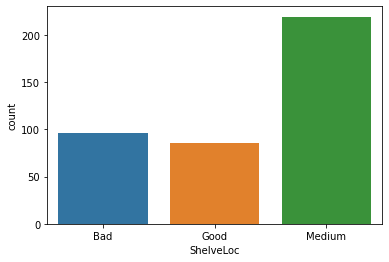

In [18]:
sns.countplot(df['ShelveLoc'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

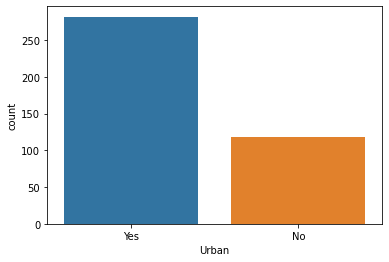

In [19]:
sns.countplot(df['Urban'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='US', ylabel='count'>

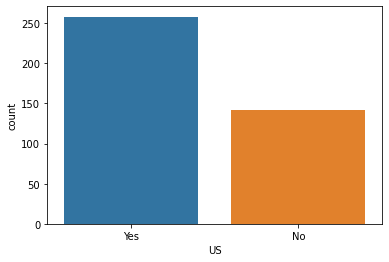

In [20]:
sns.countplot(df['US'])

In [21]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['US']=LE.fit_transform(df['US'])

In [22]:
df['ShelveLoc']=df['ShelveLoc'].map({'Bad':1,'Good':2,'Medium':3})

In [23]:
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          1   42   
1    11.22        111      48           16         260     83          2   65   
2    10.06        113      35           10         269     80          3   59   
3     7.40        117     100            4         466     97          3   55   
4     4.15        141      64            3         340    128          1   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          2   33   
396   6.14        139      23            3          37    120          3   55   
397   7.41        162      26           12         368    159          3   40   
398   5.94        100      79            7         284     95          1   50   
399   9.71        134      37            0          27    120          2   49   

     Education Urban  US  
0           17   Yes   1  
1           10   Yes   1  
2           12   Yes   1  
3           14   Yes   1  
4           13   Yes   0  
..         ...   ...  ..  
395         14   Yes   1  
396         11    No   1  
397         18   Yes   1  
398         12   Yes   1  
399         16   Yes   1  

[400 rows x 11 columns]

In [24]:
df=pd.get_dummies(df,columns=['Urban'],drop_first=True)

In [25]:
df=df.rename({'Urban_Yes':'Urban'},axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   US           400 non-null    int32  
 10  Urban        400 non-null    uint8  
dtypes: float64(1), int32(1), int64(8), uint8(1)
memory usage: 30.2 KB


In [27]:
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          1   42   
1    11.22        111      48           16         260     83          2   65   
2    10.06        113      35           10         269     80          3   59   
3     7.40        117     100            4         466     97          3   55   
4     4.15        141      64            3         340    128          1   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          2   33   
396   6.14        139      23            3          37    120          3   55   
397   7.41        162      26           12         368    159          3   40   
398   5.94        100      79            7         284     95          1   50   
399   9.71        134      37            0          27    120          2   49   

     Education  US  Urban  
0           17   1      1  
1           10   1      1  
2           12   1      1  
3           14   1      1  
4           13   0      1  
..         ...  ..    ...  
395         14   1      1  
396         11   1      0  
397         18   1      1  
398         12   1      1  
399         16   1      1  

[400 rows x 11 columns]

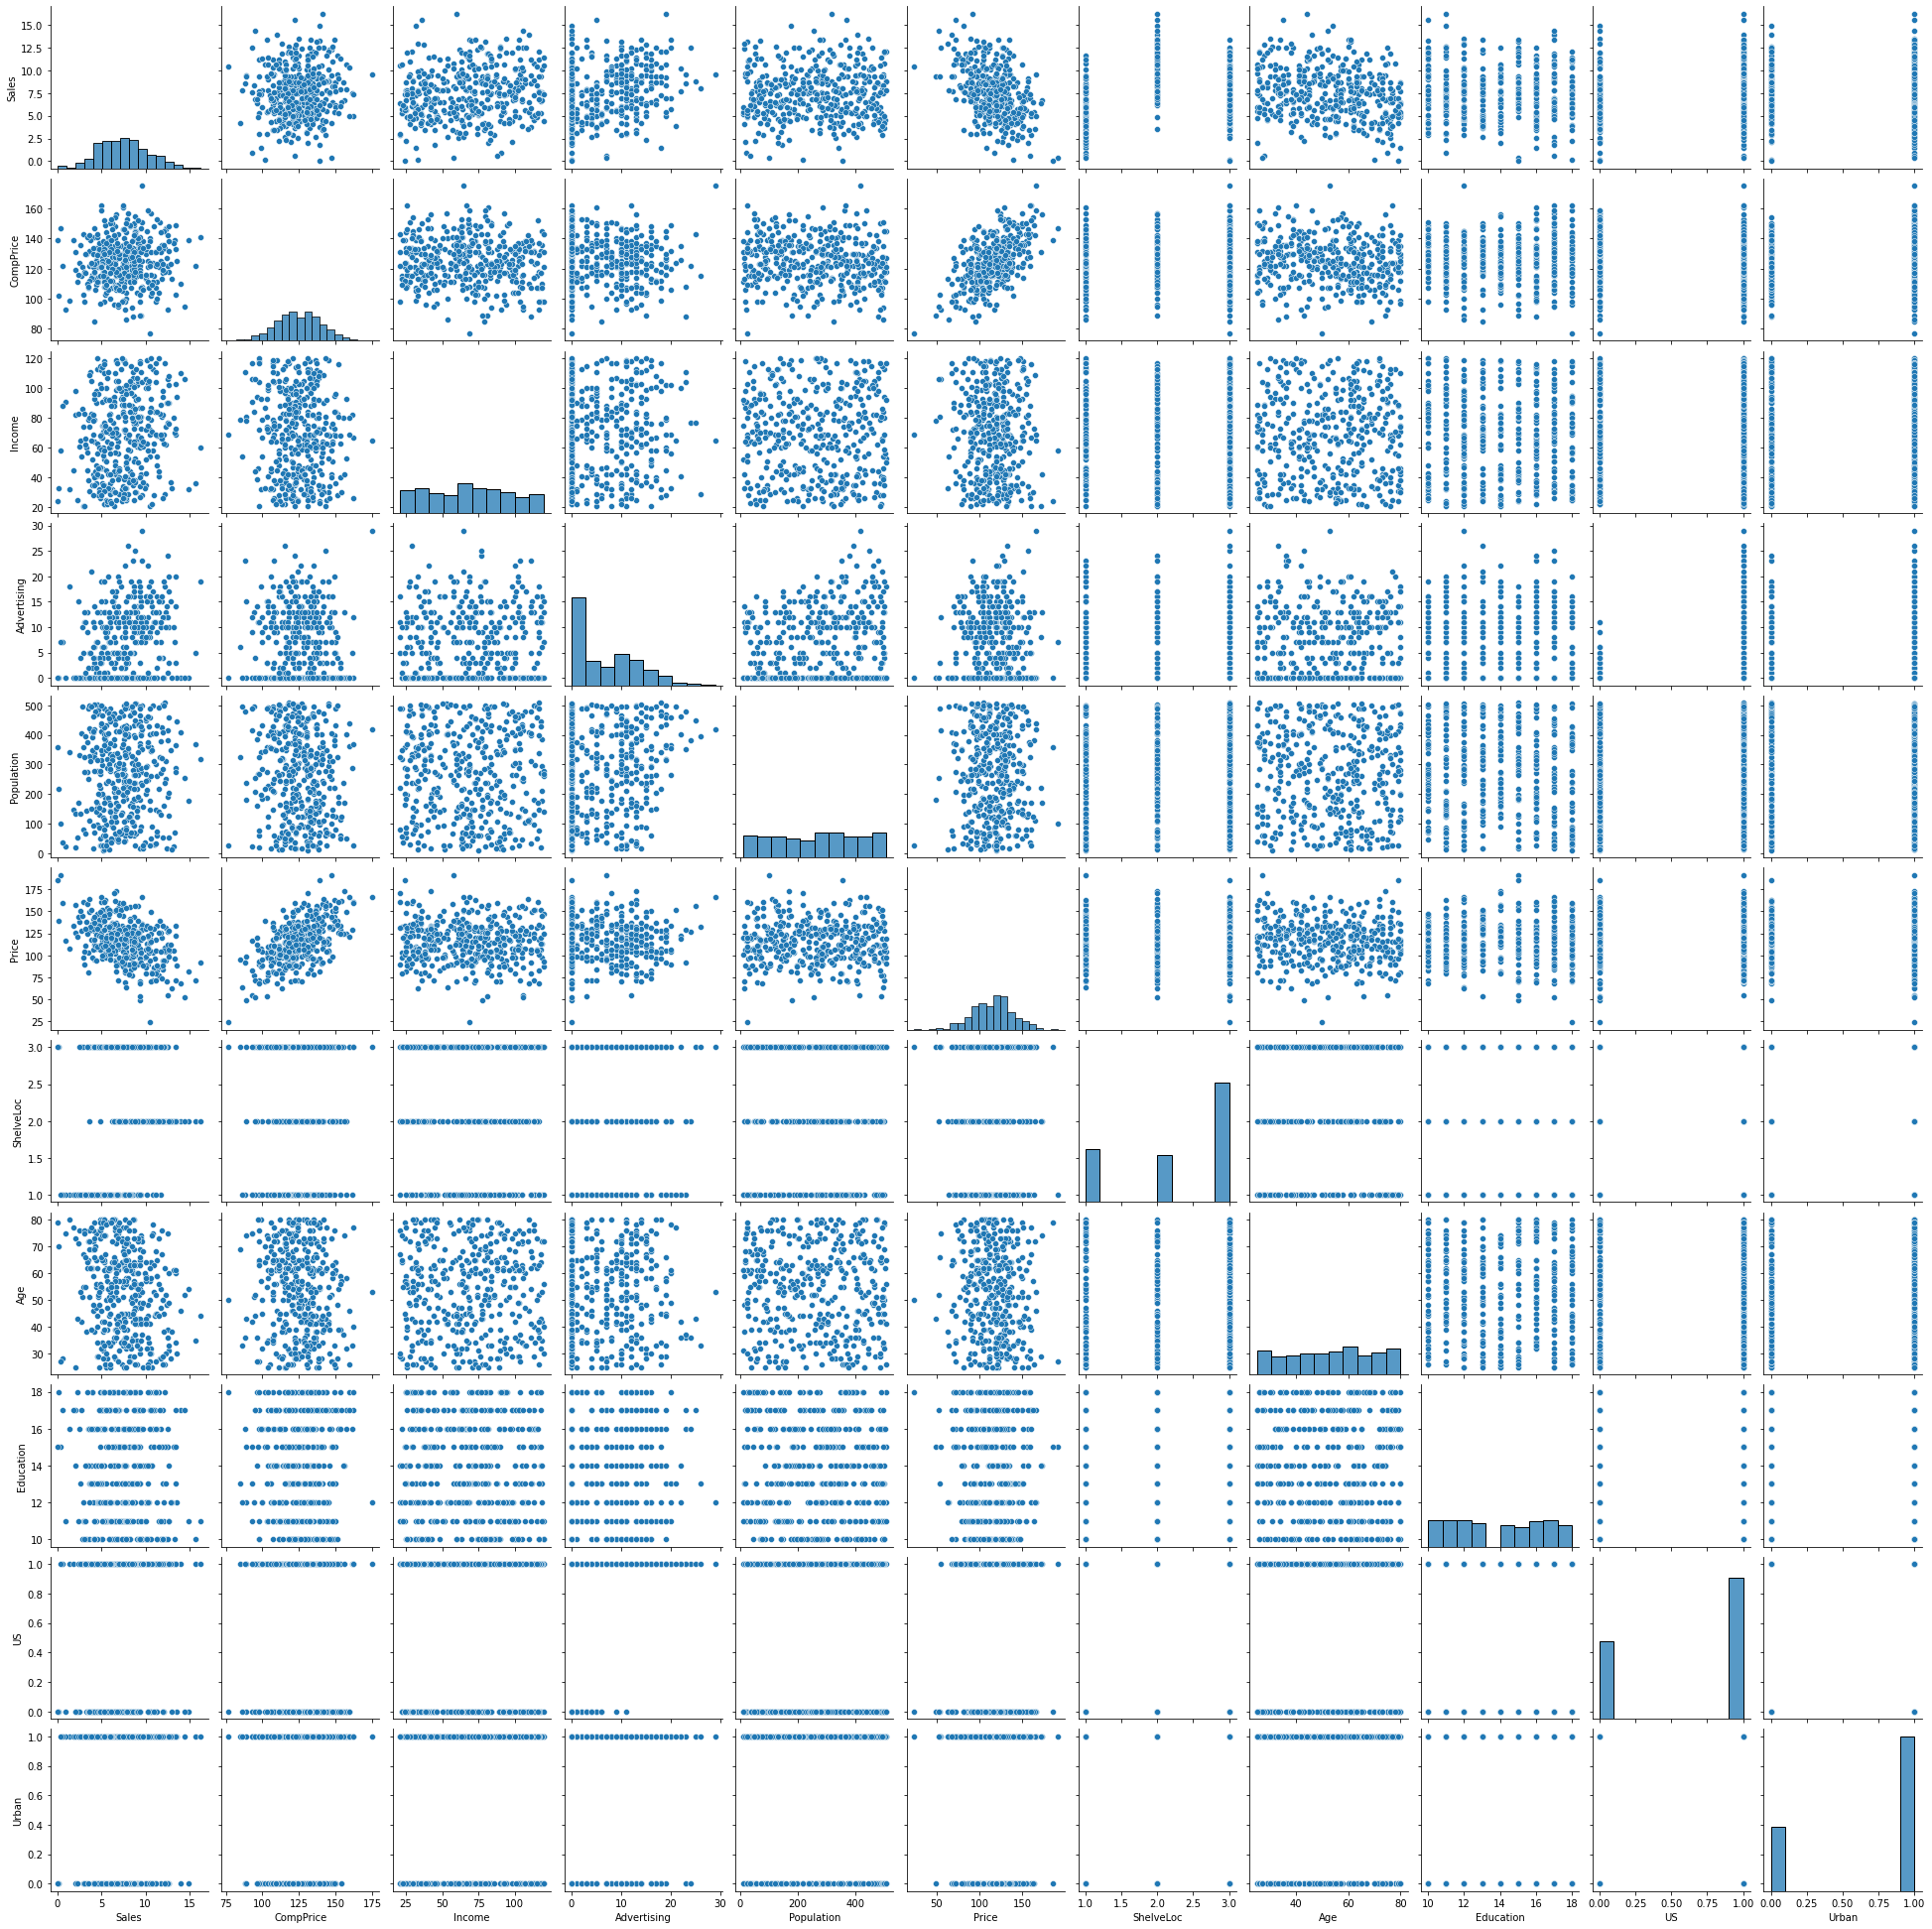

In [28]:
sns.pairplot(df)

<AxesSubplot:xlabel='Price', ylabel='Count'>

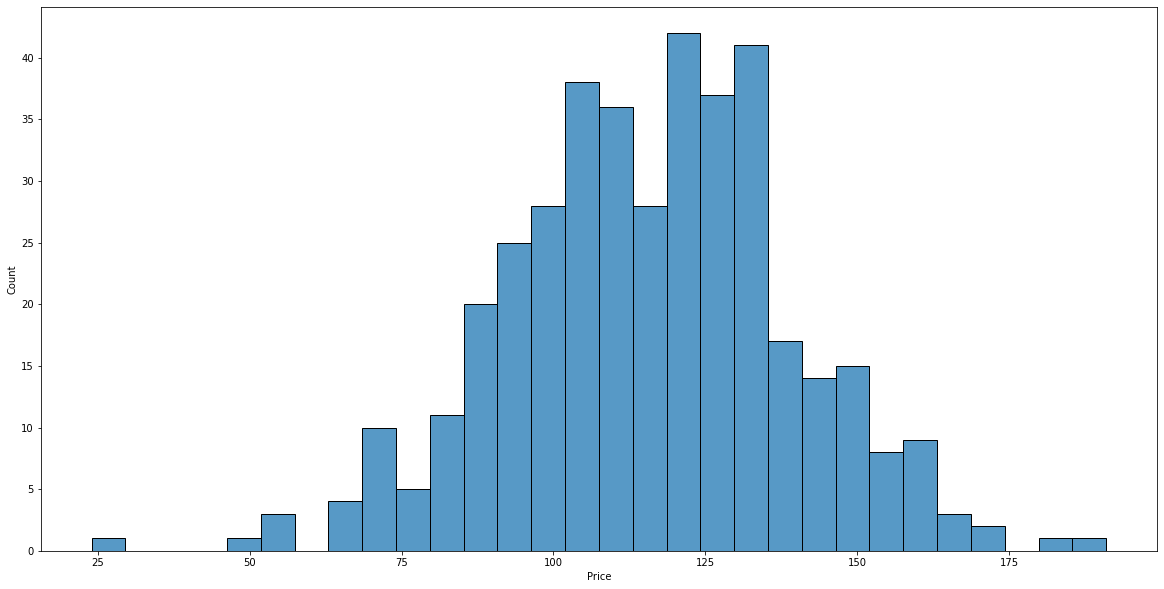

In [29]:
plt.figure(figsize=(20,10))
sns.histplot(df['Price'],bins=30)

In [30]:
df['Price'].value_counts()

120    12
128    12
107    10
104    10
131    10
       ..
49      1
155     1
24      1
148     1
78      1
Name: Price, Length: 101, dtype: int64

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Advertising'>

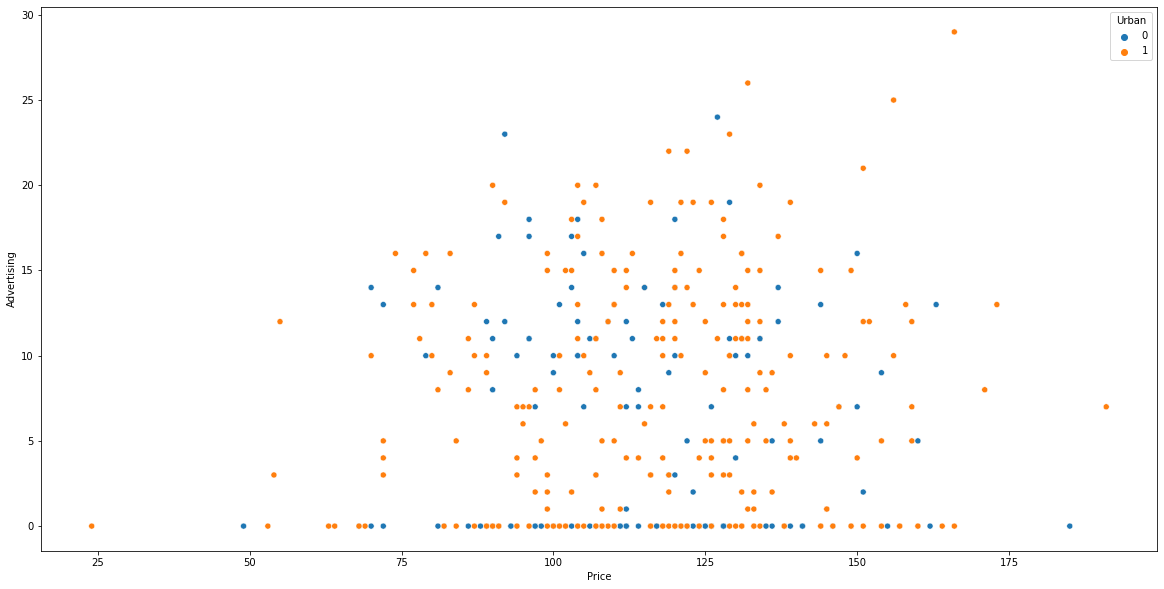

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Price'],df['Advertising'],hue=df['Urban'])

## DecisionTreeRegressor

In [32]:
from statsmodels.formula.api import ols

In [33]:
model=ols('Sales~CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+US+Urban',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     52.33
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           6.94e-66
Time:                        15:47:54   Log-Likelihood:                -811.89
No. Observations:                 400   AIC:                             1646.
Df Residuals:                     389   BIC:                             1690.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.3922      1.125      5.683      0.000       4.181       8.604
CompPrice       0.0935      0.008     12.300      0.000       0.079       0.108
Income          0.0141      0.003      4.185      0.000       0.008       0.021
Advertising     0.1294      0.020      6.348      0.000       0.089       0.169
Population   2.584e-05      0.001      0.038      0.970      -0.001       0.001
Price          -0.0926      0.005    -18.926      0.000      -0.102      -0.083
ShelveLoc       0.6039      0.113      5.329      0.000       0.381       0.827
Age            -0.0467      0.006     -7.999      0.000      -0.058      -0.035
Education      -0.0391      0.036     -1.082      0.280      -0.110       0.032
US             -0.0035      0.274     -0.013      0.990      -0.543       0.536
Urban          -0.0800      0.207     -0.387      0.699      -0.486       0.326
==============================================================================
Omnibus:                       30.446   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.020
Skew:                           0.730   Prob(JB):                     1.51e-08
Kurtosis:                       2.831   Cond. No.                     4.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

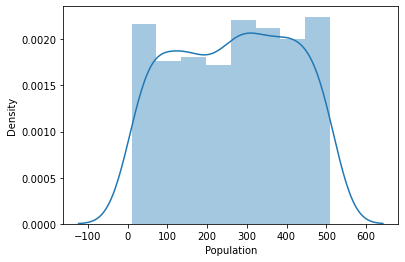

In [34]:
sns.distplot(df['Population'])

In [35]:
df_1=df.copy()

In [36]:
df_1_x=df_1.iloc[:,1:]

In [37]:
df_1_y=df_1.iloc[:,0]

In [38]:
df_1_y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_2=scaler.fit_transform(df_1_x)

In [40]:
df_2=pd.DataFrame(df_2,columns=('CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'US', 'Urban'))

In [41]:
df_1.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'US', 'Urban'],
      dtype='object')

In [42]:
df_2['Sales']=df_1_y

In [43]:
df_2

CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0     0.850455  0.155361     0.657177    0.075819  0.177823  -1.570698   
1    -0.912484 -0.739060     1.409957   -0.032882 -1.386854  -0.369399   
2    -0.781896 -1.204159     0.506621    0.028262 -1.513719   0.831899   
3    -0.520720  1.121336    -0.396715    1.366649 -0.794814   0.831899   
4     1.046337 -0.166631    -0.547271    0.510625  0.516132  -1.570698   
..         ...       ...          ...         ...       ...        ...   
395   0.850455  1.407551     1.560513   -0.420131  0.516132  -0.369399   
396   0.915749 -1.633482    -0.547271   -1.547909  0.177823   0.831899   
397   2.417512 -1.526151     0.807733    0.700853  1.827078   0.831899   
398  -1.630719  0.370022     0.054953    0.130170 -0.879391  -1.570698   
399   0.589279 -1.132606    -0.998939   -1.615848  0.177823  -0.369399   

          Age  Education        US     Urban  Sales  
0   -0.699782   1.184449  0.741881  0.646869   9.50  
1    0.721723  -1.490113  0.741881  0.646869  11.22  
2    0.350895  -0.725953  0.741881  0.646869  10.06  
3    0.103677   0.038208  0.741881  0.646869   7.40  
4   -0.947000  -0.343872 -1.347925  0.646869   4.15  
..        ...        ...       ...       ...    ...  
395 -1.256023   0.038208  0.741881  0.646869  12.57  
396  0.103677  -1.108033  0.741881 -1.545908   6.14  
397 -0.823391   1.566529  0.741881  0.646869   7.41  
398 -0.205346  -0.725953  0.741881  0.646869   5.94  
399 -0.267150   0.802369  0.741881  0.646869   9.71  

[400 rows x 11 columns]

In [44]:
model_1=ols('Sales~CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+US+Urban',data=df_2).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     52.33
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           6.94e-66
Time:                        15:47:55   Log-Likelihood:                -811.89
No. Observations:                 400   AIC:                             1646.
Df Residuals:                     389   BIC:                             1690.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.4963      0.093     80.272      0.000       7.313       7.680
CompPrice       1.4322      0.116     12.300      0.000       1.203       1.661
Income          0.3955      0.094      4.185      0.000       0.210       0.581
Advertising     0.8595      0.135      6.348      0.000       0.593       1.126
Population      0.0038      0.100      0.038      0.970      -0.193       0.200
Price          -2.1899      0.116    -18.926      0.000      -2.417      -1.962
ShelveLoc       0.5027      0.094      5.329      0.000       0.317       0.688
Age            -0.7548      0.094     -7.999      0.000      -0.940      -0.569
Education      -0.1023      0.095     -1.082      0.280      -0.288       0.084
US             -0.0017      0.131     -0.013      0.990      -0.260       0.257
Urban          -0.0365      0.094     -0.387      0.699      -0.222       0.149
==============================================================================
Omnibus:                       30.446   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.020
Skew:                           0.730   Prob(JB):                     1.51e-08
Kurtosis:                       2.831   Cond. No.                         2.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

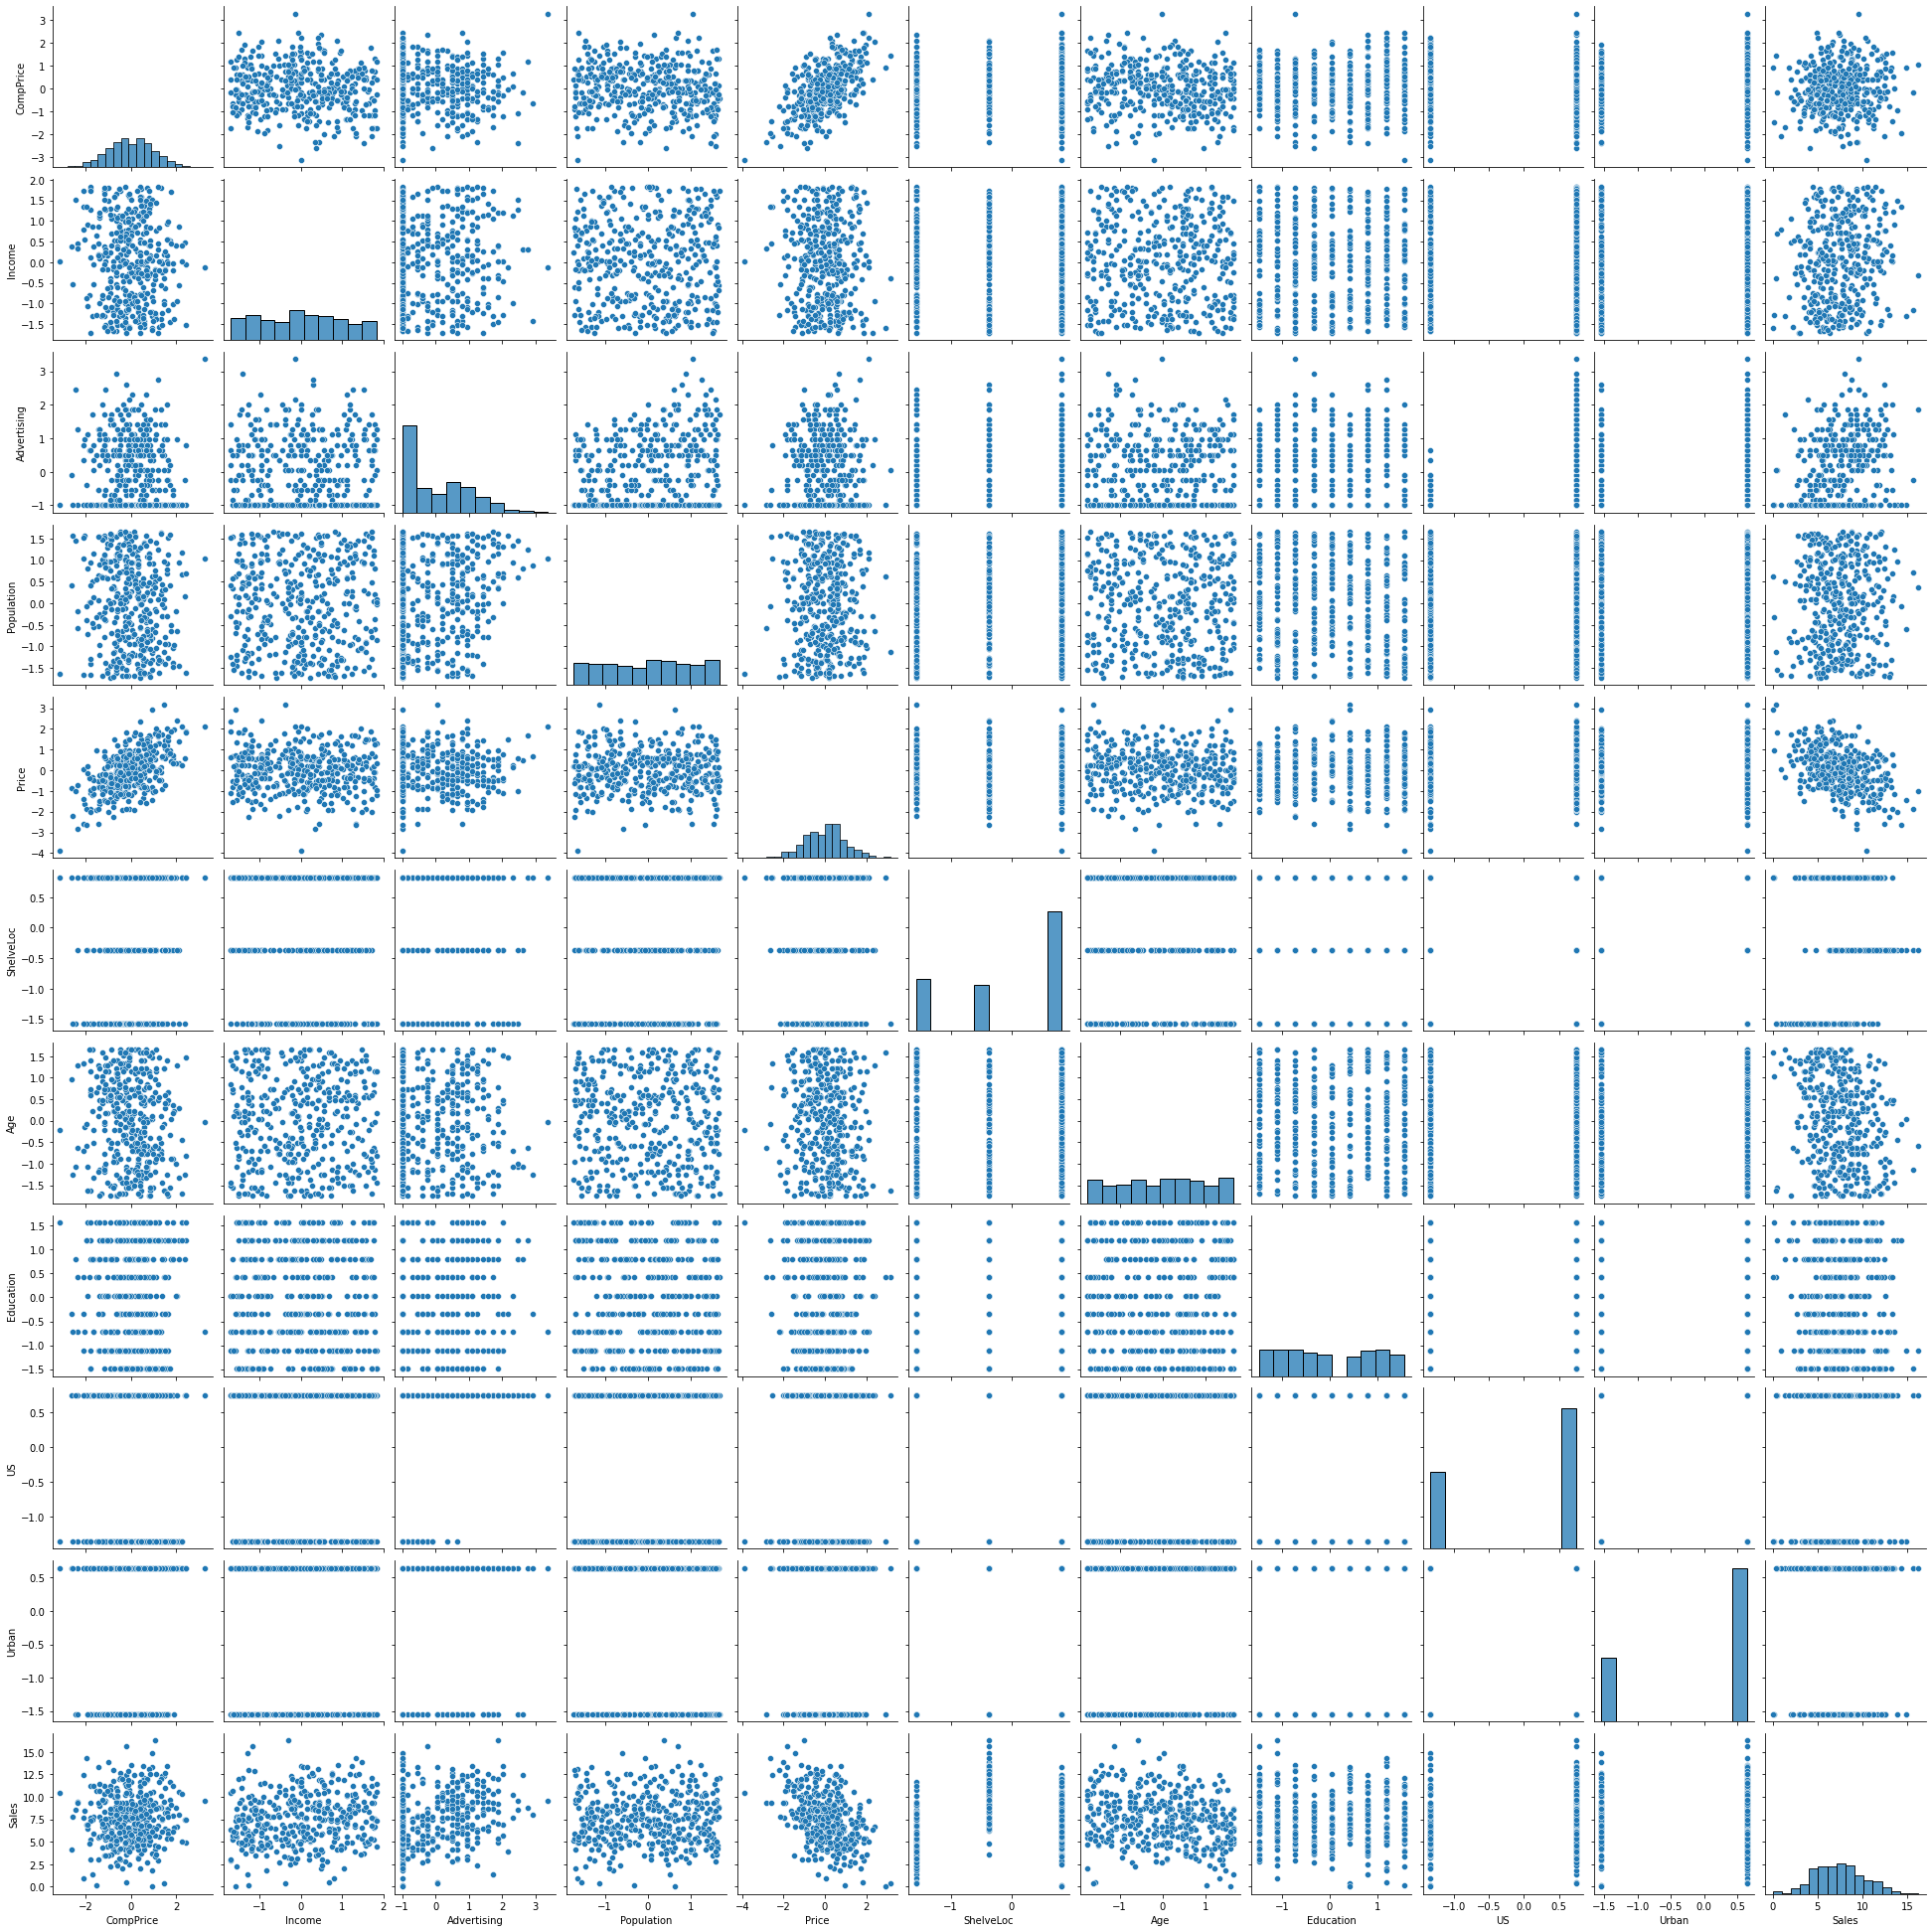

In [45]:
sns.pairplot(df_2)

In [46]:
df[['Population','Sales']]

Population  Sales
0           276   9.50
1           260  11.22
2           269  10.06
3           466   7.40
4           340   4.15
..          ...    ...
395         203  12.57
396          37   6.14
397         368   7.41
398         284   5.94
399          27   9.71

[400 rows x 2 columns]

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Population'>

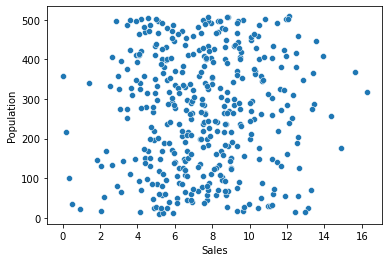

In [47]:
sns.scatterplot(df['Sales'],df['Population'])

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
x=df_1_x

In [50]:
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif

features        VIF
0    CompPrice  69.551169
1       Income   6.572133
2  Advertising   4.179196
3   Population   4.418055
4        Price  38.340190
5    ShelveLoc   8.357280
6          Age  10.724611
7    Education  23.117178
8           US   5.496374
9        Urban   3.418759

In [51]:
import statsmodels.api as sm

eval_env: 1


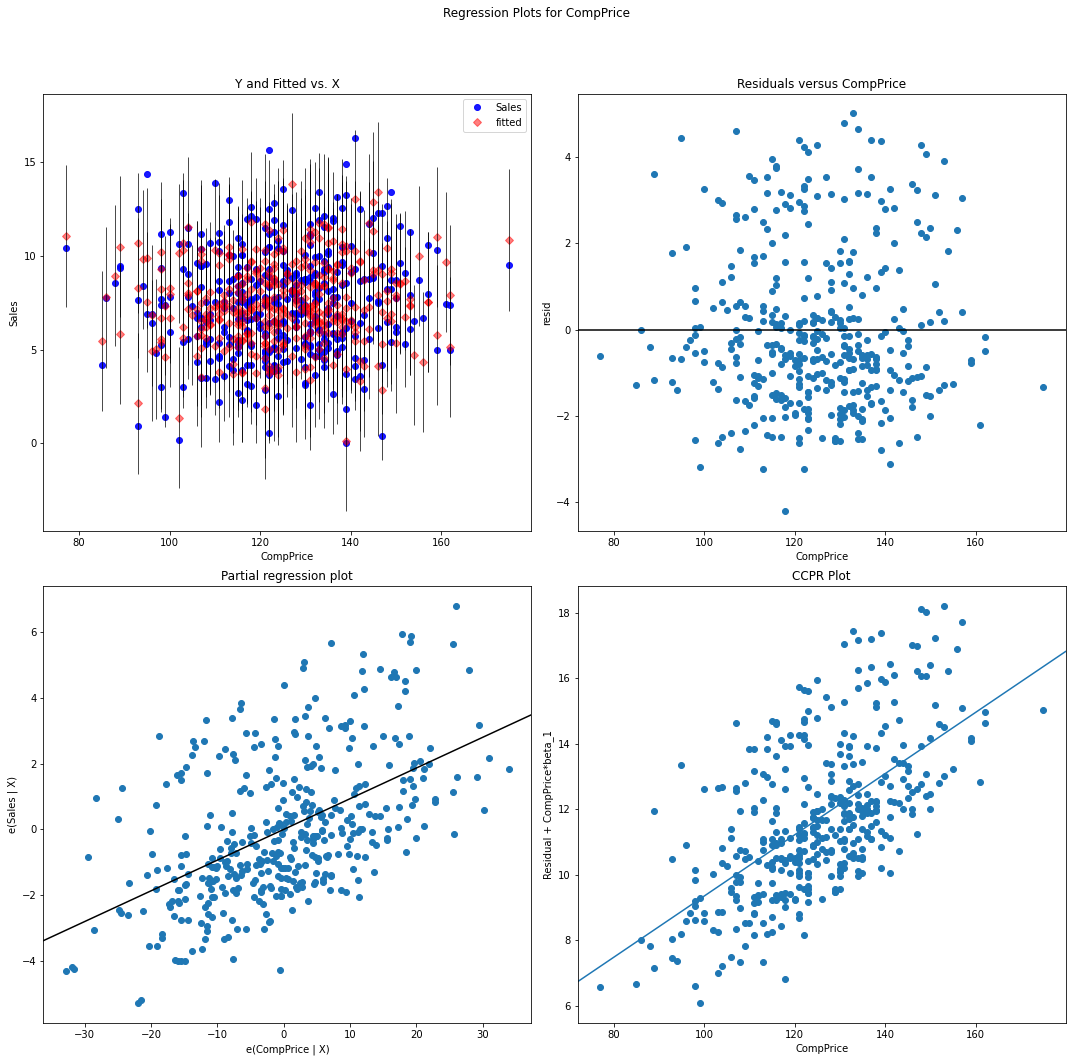

In [52]:
fig=plt.figure(figsize=(15,15))
plot_C=sm.graphics.plot_regress_exog(model,'CompPrice',fig=fig)

In [53]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'US', 'Urban'],
      dtype='object')

eval_env: 1


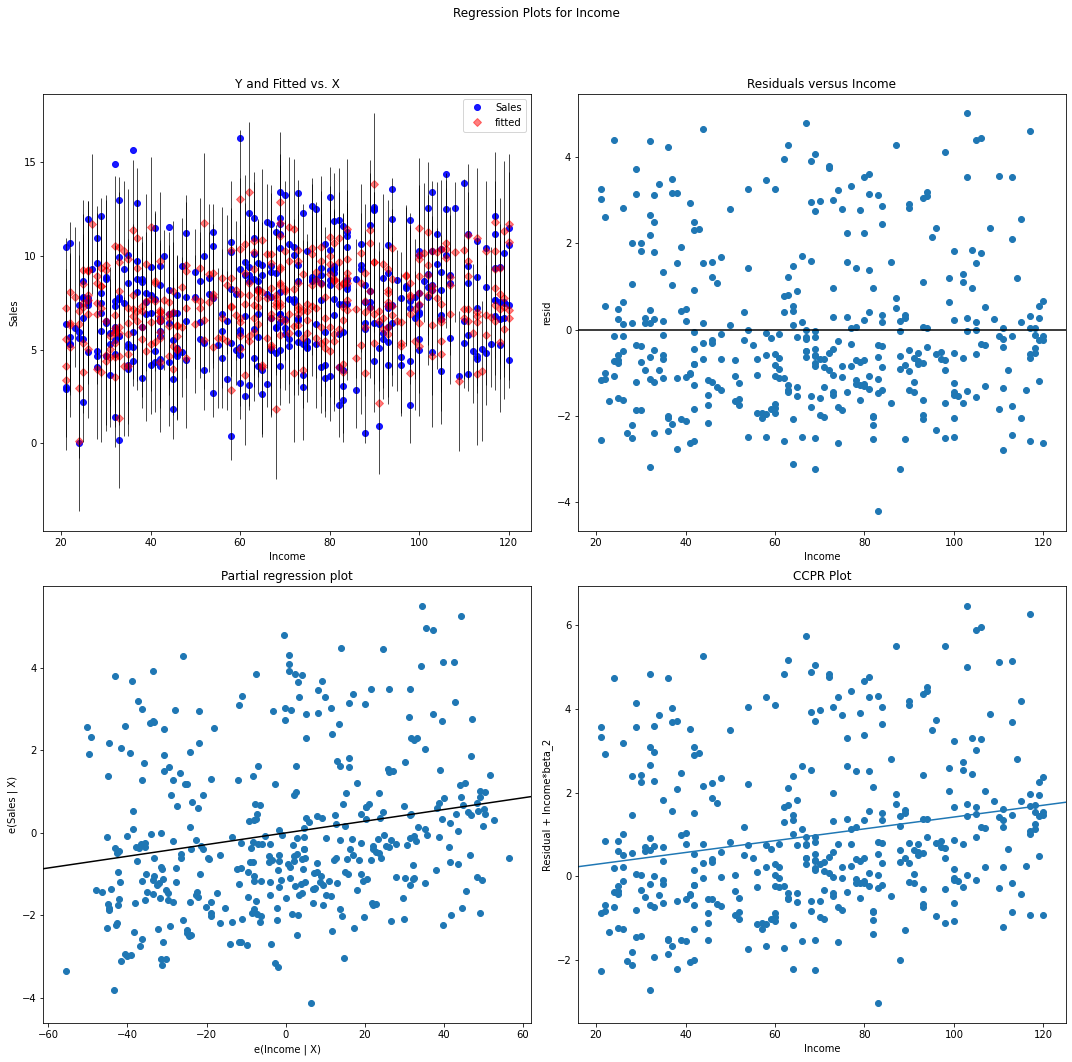

In [54]:
fig=plt.figure(figsize=(15,15))
plot_Income=sm.graphics.plot_regress_exog(model,'Income',fig=fig)

eval_env: 1


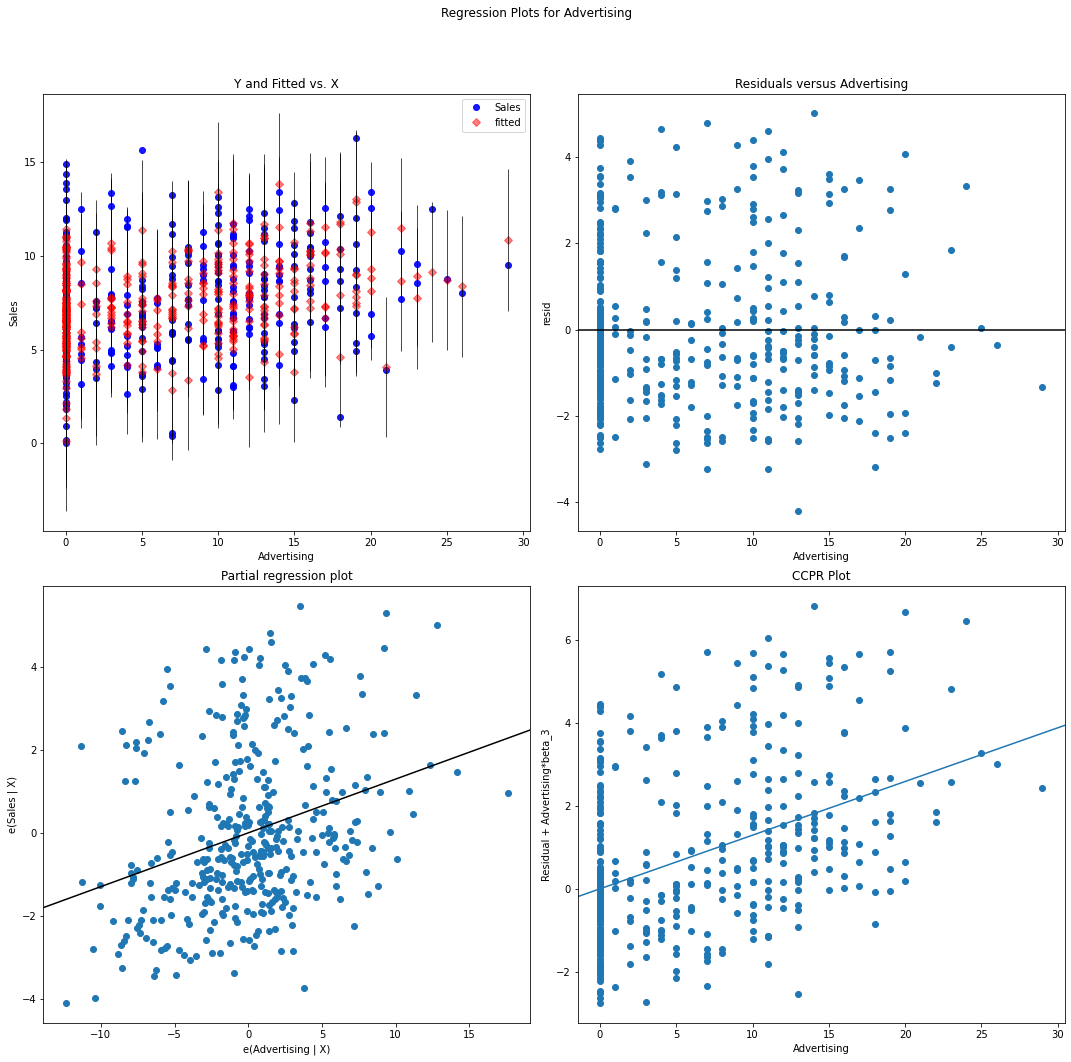

In [55]:
fig=plt.figure(figsize=(15,15))
plot_ad=sm.graphics.plot_regress_exog(model,'Advertising',fig=fig)

eval_env: 1


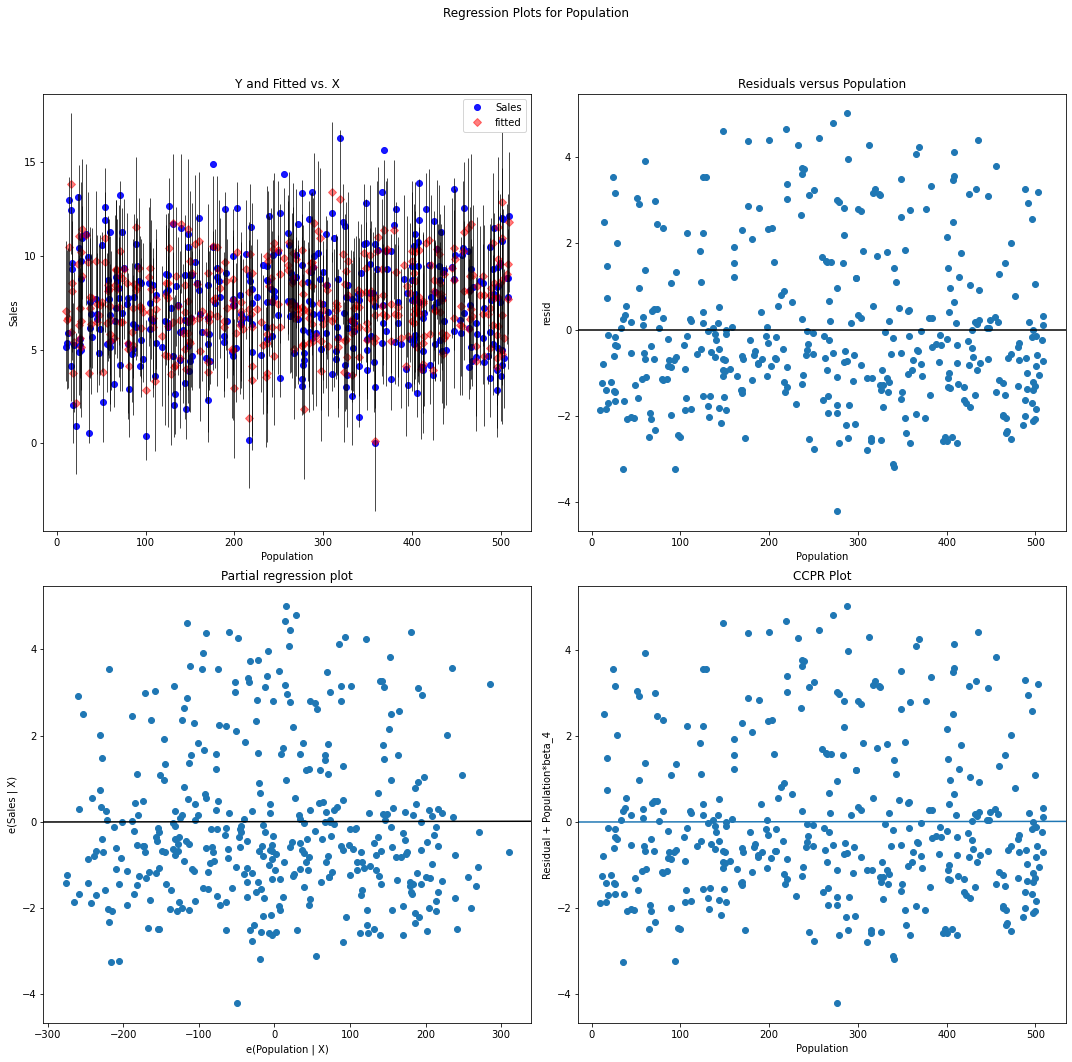

In [56]:
fig=plt.figure(figsize=(15,15))
plot_pop=sm.graphics.plot_regress_exog(model,'Population',fig=fig)

eval_env: 1


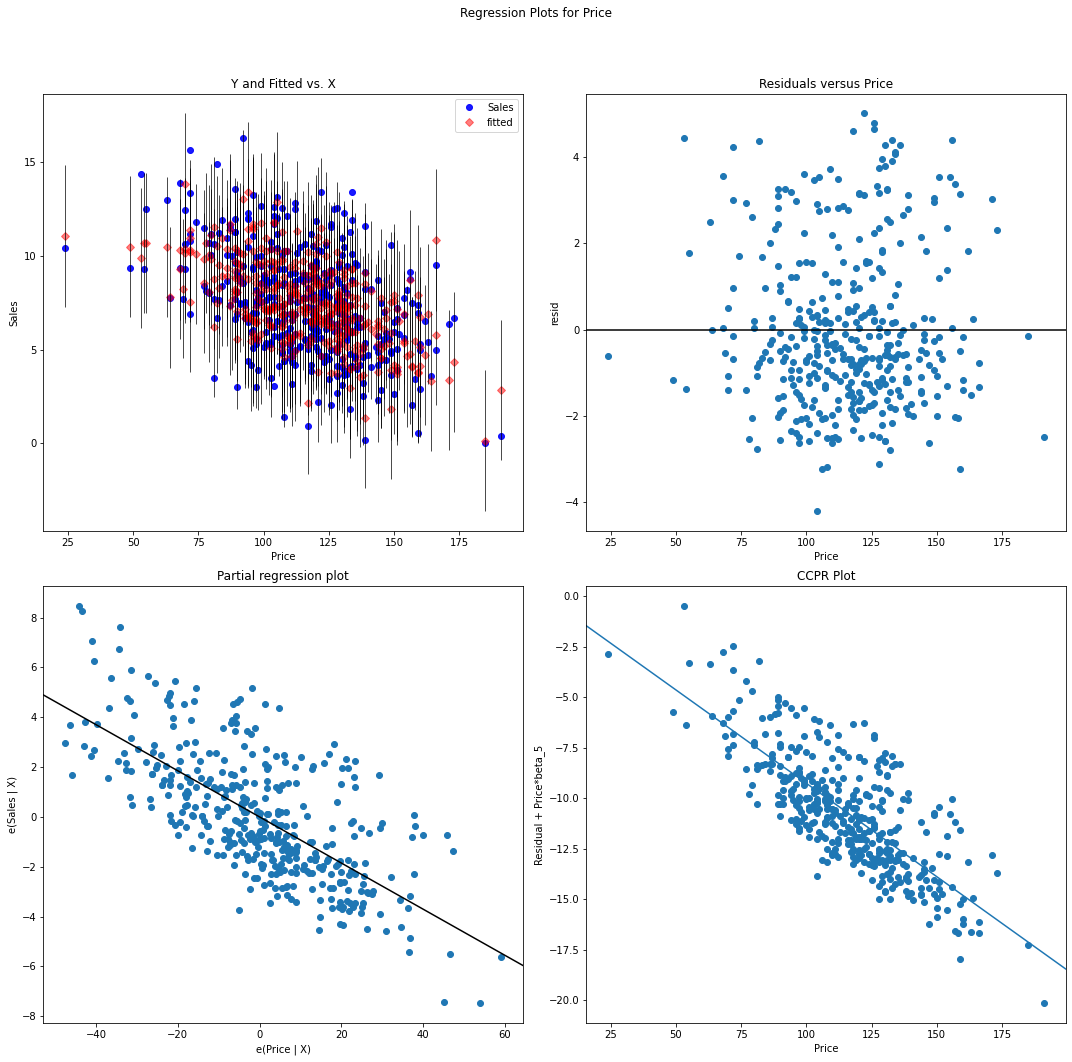

In [57]:
fig=plt.figure(figsize=(15,15))
plot_Price=sm.graphics.plot_regress_exog(model,'Price',fig=fig)

eval_env: 1


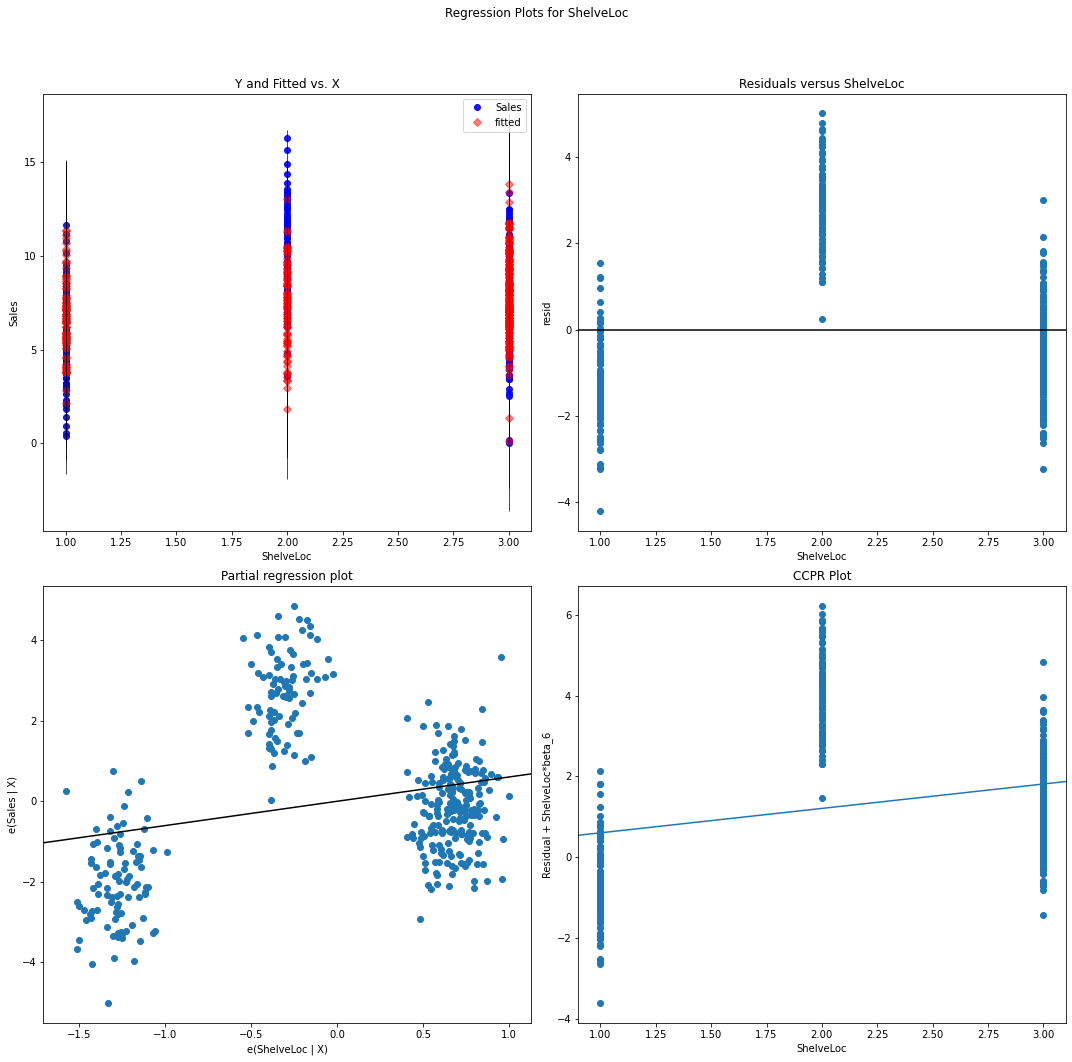

In [58]:
fig=plt.figure(figsize=(15,15))
plot_shel=sm.graphics.plot_regress_exog(model,'ShelveLoc',fig=fig)

eval_env: 1


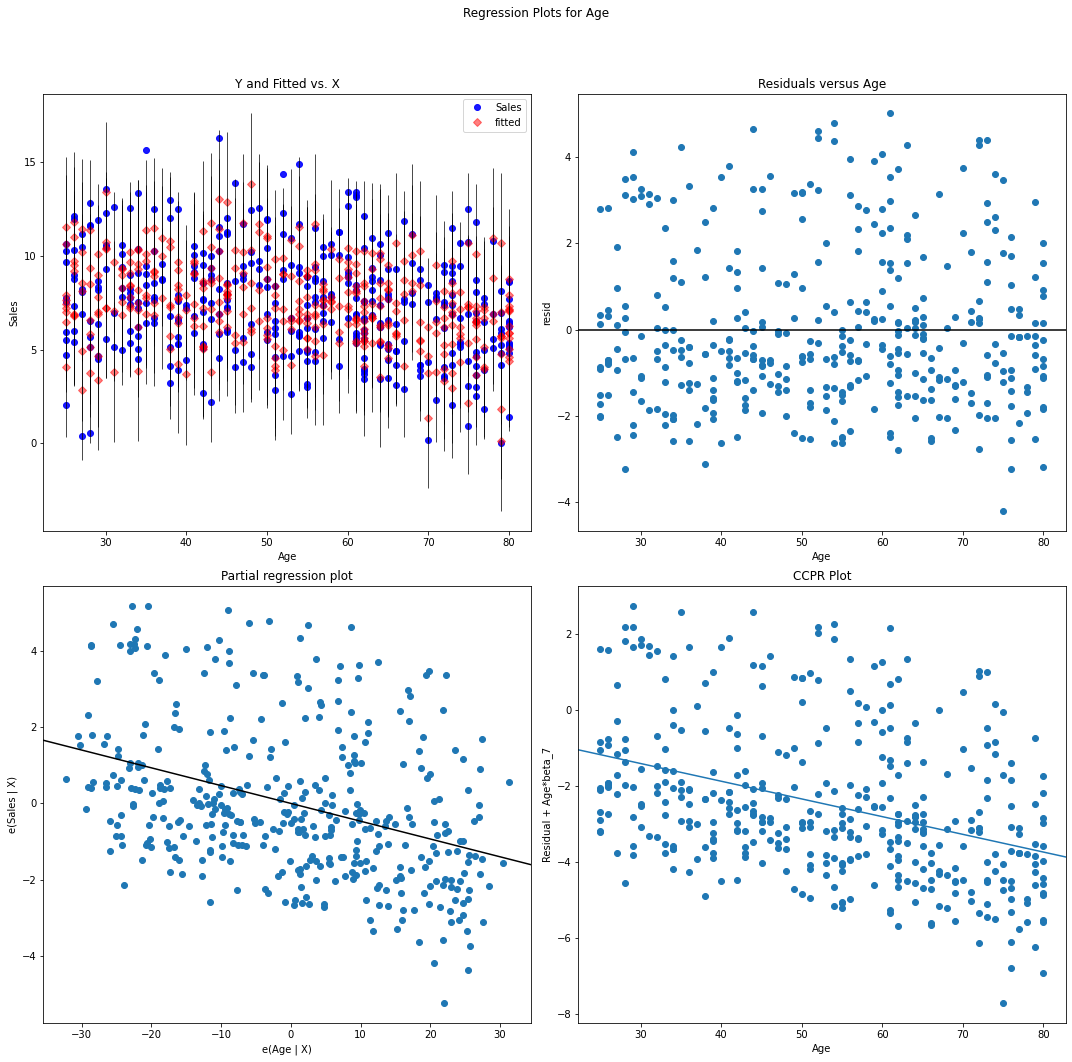

In [59]:
fig=plt.figure(figsize=(15,15))
plot_age=sm.graphics.plot_regress_exog(model,'Age',fig=fig)

eval_env: 1


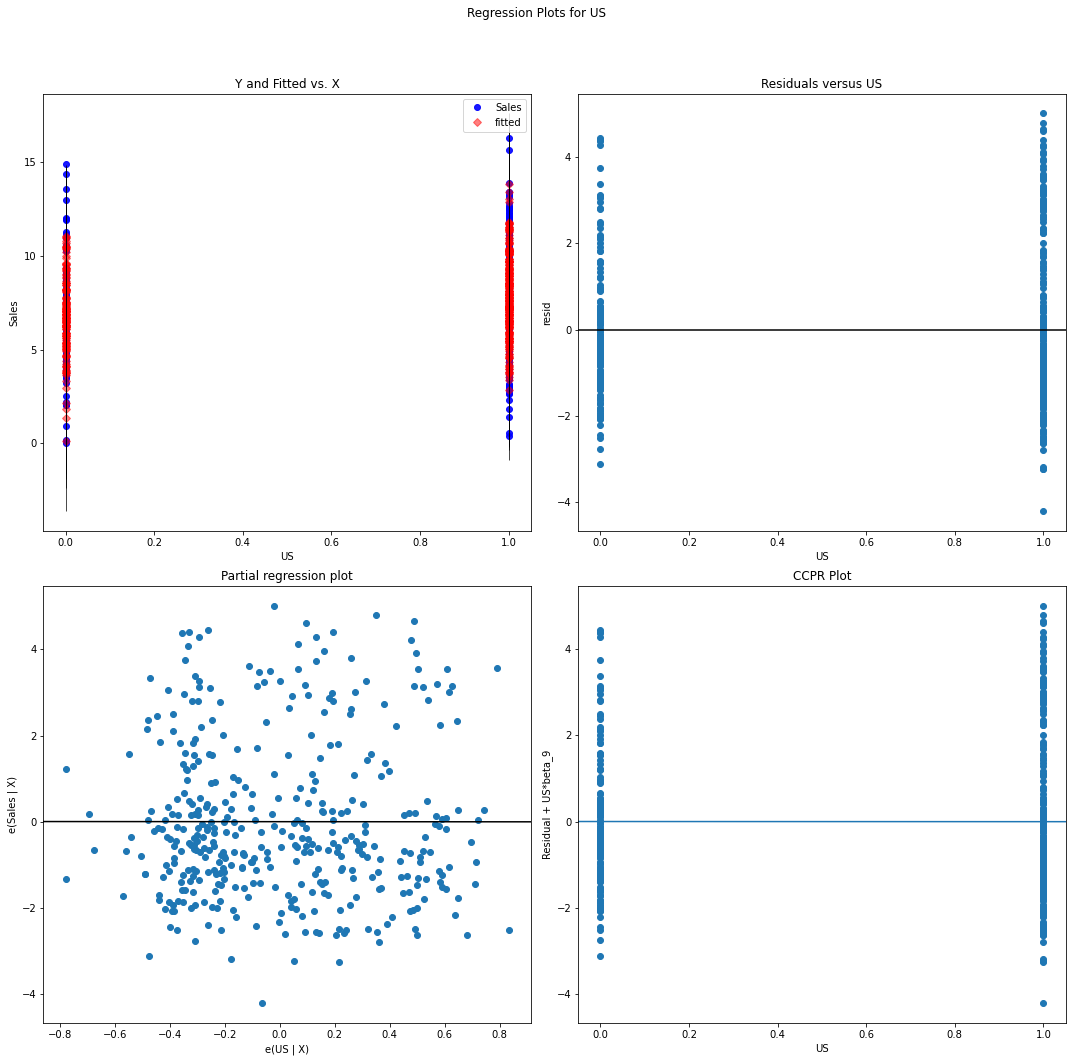

In [60]:
fig=plt.figure(figsize=(15,15))
plot_us=sm.graphics.plot_regress_exog(model,'US',fig=fig)

eval_env: 1


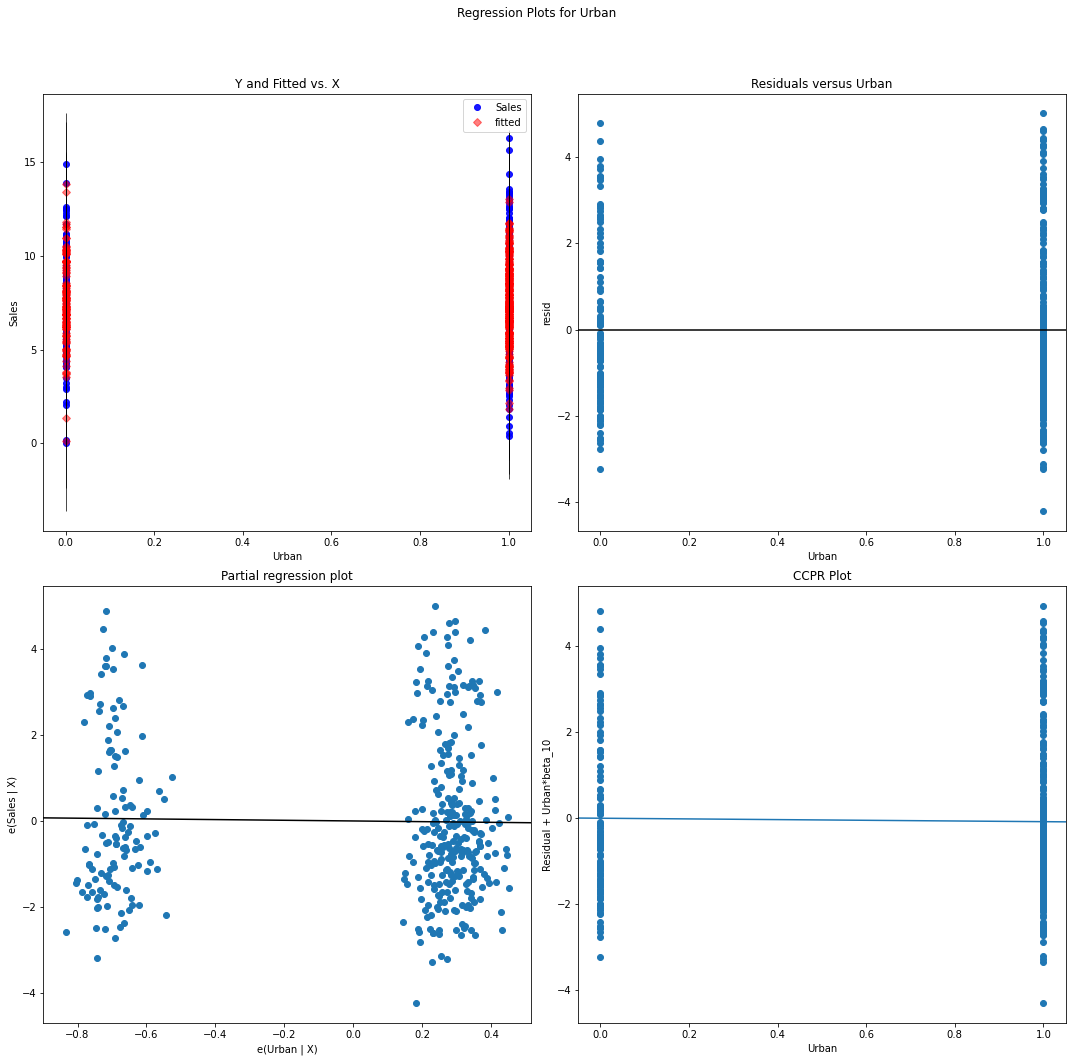

In [61]:
fig=plt.figure(figsize=(15,15))
plot_urban=sm.graphics.plot_regress_exog(model,'Urban',fig=fig)

eval_env: 1


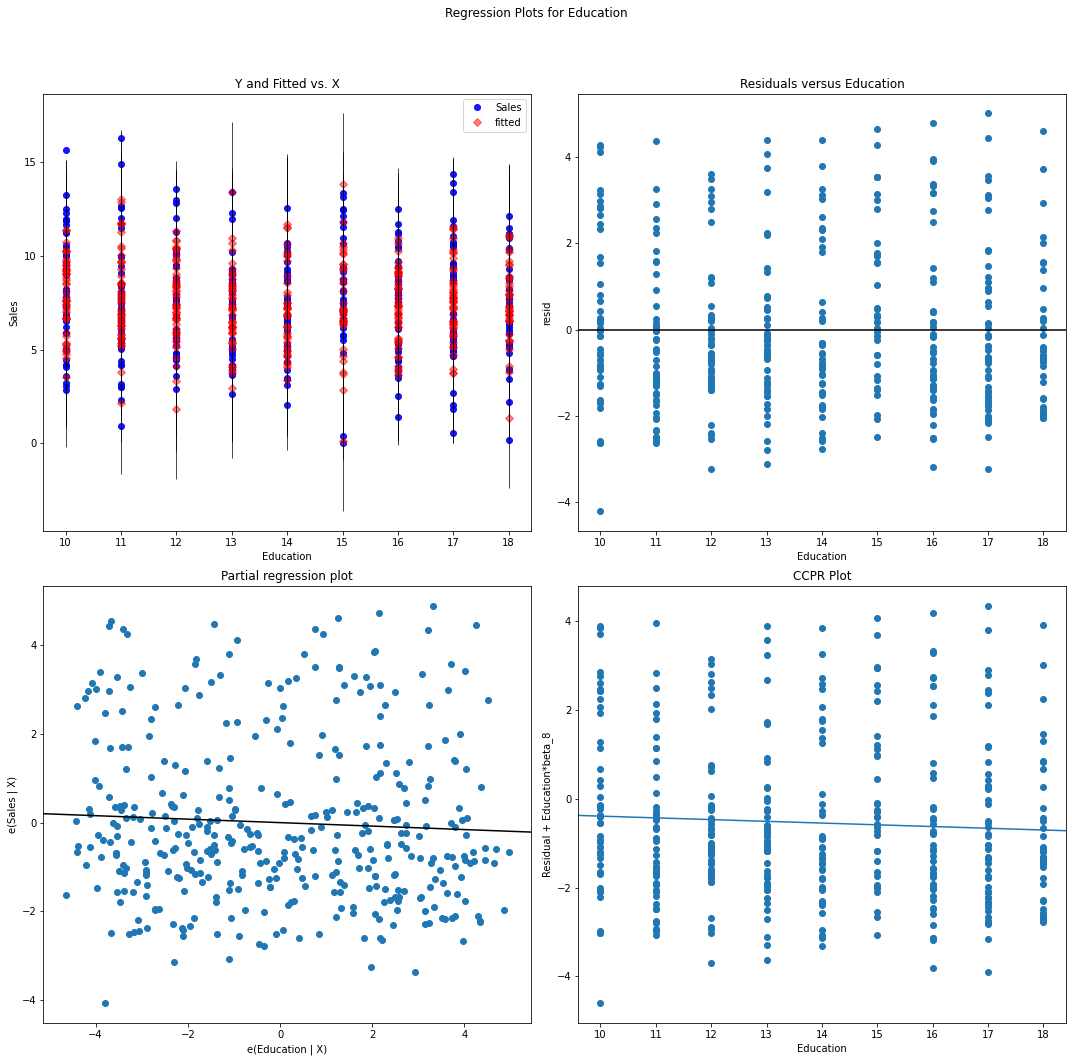

In [62]:
fig=plt.figure(figsize=(15,15))
plot_edu=sm.graphics.plot_regress_exog(model,'Education',fig=fig)

In [63]:
df_4=df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Price',
       'ShelveLoc', 'Age', 'Education']]

In [64]:
model_2=ols('Sales~CompPrice+Income+Advertising+Price+ShelveLoc+Age+Education',data=df_4).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     75.27
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.26e-68
Time:                        15:48:45   Log-Likelihood:                -811.97
No. Observations:                 400   AIC:                             1640.
Df Residuals:                     392   BIC:                             1672.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.3667      1.063      5.991      0.000       4.277       8.456
CompPrice       0.0933      0.008     12.396      0.000       0.079       0.108
Income          0.0141      0.003      4.197      0.000       0.007       0.021
Advertising     0.1292      0.014      9.173      0.000       0.101       0.157
Price          -0.0926      0.005    -19.013      0.000      -0.102      -0.083
ShelveLoc       0.6067      0.112      5.405      0.000       0.386       0.827
Age            -0.0468      0.006     -8.063      0.000      -0.058      -0.035
Education      -0.0388      0.036     -1.088      0.277      -0.109       0.031
==============================================================================
Omnibus:                       30.566   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.187
Skew:                           0.732   Prob(JB):                     1.39e-08
Kurtosis:                       2.830   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
model_3=DecisionTreeRegressor(random_state=0,splitter='best')
model_3.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [70]:
y_pred=model_3.predict(x_test)

In [71]:
y_pred=pd.Series(data=y_pred)

In [72]:
y_pred

0      6.39
1      8.39
2      6.98
3      5.07
4      8.14
      ...  
75     8.21
76    11.96
77     6.20
78     7.56
79    11.96
Length: 80, dtype: float64

In [73]:
y_test.reset_index(drop='index',inplace=True)

In [74]:
y_test

0      9.54
1     11.18
2      7.38
3      4.10
4      6.90
      ...  
75    11.17
76    10.26
77    11.93
78     8.68
79    11.27
Name: Sales, Length: 80, dtype: float64

In [75]:
from sklearn.metrics import r2_score

In [76]:
print('r2_score for decision tree regression:',r2_score(y_test,y_pred))

r2_score for decision tree regression: 0.3148833530136713


In [77]:
import math
MSE=np.square(np.subtract(y_test,y_pred).mean())
RMSE=math.sqrt(MSE)

In [78]:
print("MSE:{}".format(MSE))
print('RMSE:',RMSE)

MSE:0.3967425156249995
RMSE: 0.6298749999999996


In [79]:
train_result=model_3.score(x_train,y_train)
test_result=model_3.score(x_test,y_test)
print(train_result*100)
print(test_result*100)

100.0
31.488335301367133


In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [82]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)
model_4=DecisionTreeRegressor()
result=cross_val_score(model_4,x,y,cv=kfold)

In [83]:
result=result.reshape(-1,1)
print(result*100)

[[-41.68948673]
 [ 24.80959399]
 [ 23.96854398]
 [ 35.02238803]
 [ 44.3191981 ]
 [ 54.10553915]
 [-19.13816831]
 [ 42.64401738]
 [ 29.35290678]
 [ 50.96602928]]


## DecisionTreeClassification

In [84]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [85]:
data=df.copy()
data['Sales'].mean()

7.496325

In [86]:
data["sales"]="small"
data.loc[data["Sales"]>7.49,"sales"]="large"
data.drop(["Sales"],axis=1,inplace=True)

In [87]:
x=data.iloc[:,:10]
y=data.iloc[:,-1]

In [88]:
y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [90]:
model_5=DecisionTreeClassifier(criterion='gini',random_state=42)

In [91]:
model_5.fit(x_train,y_train)
y_pred_1=model_5.predict(x_test)
#y_pred_1=pd.Series(y_pred_1)
np.mean(y_pred_1==y_test)

0.725

In [92]:
y_train_p=model_5.predict(x_train)
accuracy_score(y_train,y_train_p)

1.0

In [93]:
confusion_matrix=confusion_matrix(y_test,y_pred_1)
print(confusion_matrix)
print(classification_report(y_test,y_pred_1))

[[30 15]
 [ 7 28]]
              precision    recall  f1-score   support

       large       0.81      0.67      0.73        45
       small       0.65      0.80      0.72        35

    accuracy                           0.73        80
   macro avg       0.73      0.73      0.72        80
weighted avg       0.74      0.72      0.73        80



In [94]:
model_6=DecisionTreeClassifier(criterion='entropy',random_state=42)
model_6.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [95]:
y_pred_2=model_6.predict(x_test)
np.mean(y_pred_2==y_test)

0.75

In [96]:
y_train_pr=model_6.predict(x_train)
accuracy_score(y_train,y_train_pr)

1.0

In [97]:
#confusion_matrix_1=confusion_matrix(y_test,y_pred_2)
#print(confusion_matrix_1)
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

       large       0.80      0.73      0.77        45
       small       0.69      0.77      0.73        35

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.76      0.75      0.75        80



In [98]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)
model_7=DecisionTreeClassifier()
result_1=cross_val_score(model_7,x,y,cv=kfold)

In [99]:
result_1

array([0.675, 0.725, 0.7  , 0.65 , 0.7  , 0.775, 0.7  , 0.625, 0.75 ,
       0.775])

In [100]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)
model_8=DecisionTreeClassifier(criterion='entropy')
result_2=cross_val_score(model_8,x,y,cv=kfold)

In [101]:
result_2

array([0.625, 0.725, 0.75 , 0.65 , 0.725, 0.8  , 0.7  , 0.725, 0.7  ,
       0.75 ])

[Text(0.3485054347826087, 0.9615384615384616, 'X[4] <= 105.5\nentropy = 0.999\nsamples = 320\nvalue = [154, 166]'),
 Text(0.21739130434782608, 0.8846153846153846, 'X[0] <= 124.5\nentropy = 0.836\nsamples = 109\nvalue = [80, 29]'),
 Text(0.1956521739130435, 0.8076923076923077, 'X[1] <= 100.5\nentropy = 0.937\nsamples = 82\nvalue = [53, 29]'),
 Text(0.17391304347826086, 0.7307692307692307, 'X[4] <= 90.5\nentropy = 0.984\nsamples = 68\nvalue = [39, 29]'),
 Text(0.08695652173913043, 0.6538461538461539, 'X[5] <= 1.5\nentropy = 0.677\nsamples = 28\nvalue = [23, 5]'),
 Text(0.043478260869565216, 0.5769230769230769, 'X[1] <= 49.0\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.021739130434782608, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.06521739130434782, 0.5, 'X[4] <= 86.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.043478260869565216, 0.4230769230769231, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.08695652173913043, 0.4230769230769231, 'entro

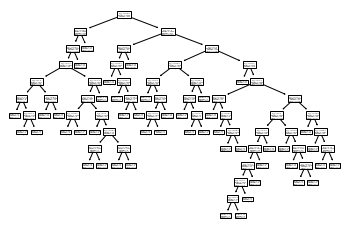

In [103]:
tree.plot_tree(model_6,impurity=True)